In [65]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import numpy as np 
import matplotlib.pyplot as plt
import skfuzzy as fuzz


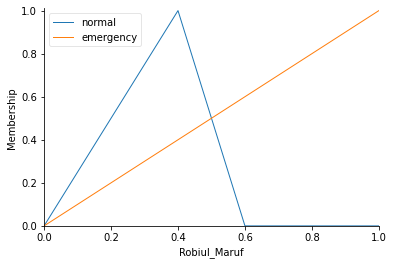

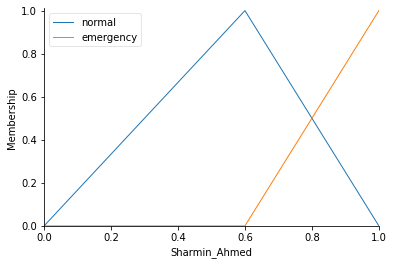

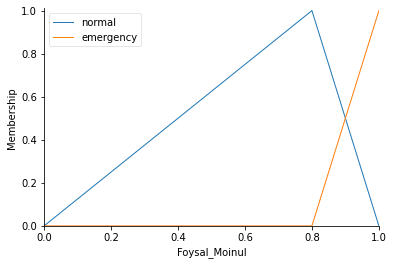

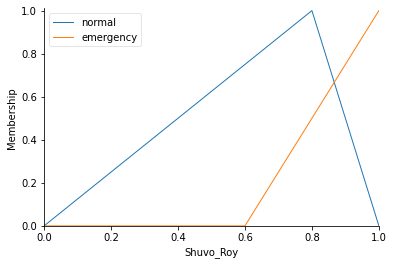

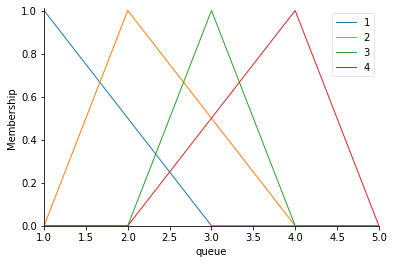

In [67]:
from skfuzzy import control as ctrl
Robiul_Maruf = ctrl.Antecedent(np.arange(0,1.2,0.2), 'Robiul_Maruf')
Sharmin_Ahmed = ctrl.Antecedent(np.arange(0,1.2,0.2), 'Sharmin_Ahmed')
Foysal_Moinul = ctrl.Antecedent(np.arange(0,1.2,0.2), 'Foysal_Moinul')
Shuvo_Roy = ctrl.Antecedent(np.arange(0,1.2,0.2), 'Shuvo_Roy')

queue = ctrl.Consequent(np.arange(1, 6, 1), 'queue')


Robiul_Maruf['normal'] = fuzz.trimf(Robiul_Maruf.universe, [0, 0.4, 0.4])
Robiul_Maruf['emergency'] = fuzz.trimf(Robiul_Maruf.universe, [0, 1, 1])

Sharmin_Ahmed['normal'] = fuzz.trimf(Robiul_Maruf.universe, [0, 0.6, 1])
Sharmin_Ahmed['emergency'] = fuzz.trimf(Robiul_Maruf.universe, [0.6, 1, 1])

Foysal_Moinul['normal'] = fuzz.trimf(Robiul_Maruf.universe, [0, 0.8, 1])
Foysal_Moinul['emergency'] = fuzz.trimf(Robiul_Maruf.universe, [0.8, 1, 1])

Shuvo_Roy['normal'] = fuzz.trimf(Robiul_Maruf.universe, [0, 0.8, 1])
Shuvo_Roy['emergency'] = fuzz.trimf(Robiul_Maruf.universe, [0.6, 1, 1])


queue['1'] = fuzz.trimf(queue.universe, [1, 1, 3])
queue['2'] = fuzz.trimf(queue.universe, [2, 2, 4])
queue['3'] = fuzz.trimf(queue.universe, [2, 3, 4])
queue['4'] = fuzz.trimf(queue.universe, [2, 4, 4])

Robiul_Maruf.view()
Sharmin_Ahmed.view()
Foysal_Moinul.view()
Shuvo_Roy.view()

queue.view()


2.3452145214521454
Sharmin_Ahmed is 1st patient


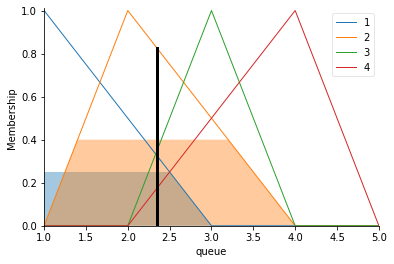

In [71]:
rule1 = ctrl.Rule(Robiul_Maruf['normal'] & Sharmin_Ahmed['emergency'], queue['1'])
rule2 = ctrl.Rule(Robiul_Maruf['emergency'] & Foysal_Moinul['normal'], queue['2'])
rule3 = ctrl.Rule(Foysal_Moinul['normal'] & Shuvo_Roy['emergency'], queue['3'])
rule4 = ctrl.Rule(Foysal_Moinul['emergency'] & Shuvo_Roy['normal'], queue['4'])
rule5 = ctrl.Rule(Foysal_Moinul['emergency'] & Shuvo_Roy['normal'], queue['3'])
rule6 = ctrl.Rule(Foysal_Moinul['normal'] & Shuvo_Roy['emergency'], queue['4'])


queue_value = ctrl.ControlSystem([rule1,rule2, rule3, rule4])
queue_value_sim = ctrl.ControlSystemSimulation(queue_value)

queue_value_sim.input['Robiul_Maruf'] = 0.4
queue_value_sim.input['Sharmin_Ahmed'] = 0.7
queue_value_sim.input['Foysal_Moinul'] = 0.5
queue_value_sim.input['Shuvo_Roy'] = 0.5


queue_value_sim.compute()
value = queue_value_sim.output['queue']
print(value)
queue.view(sim=queue_value_sim)

if value<2 :
  print("Robiul_Maruf is 1st patient")
elif  2<=value<3 :
  print("Sharmin_Ahmed is 1st patient")
elif 3<=value<4 :
  print("Foysal_Moinul is 1st patient")
else :
  print("Shuvo_Roy is 1st patient")
